In [1]:
import ttvfast
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from ttvfast import models
import pdb



gravity =  0.000295994511                        # AU^3/day^2/M_sun
stellar_mass = 0.518 #0.95573417954    #change me                # M_sun


planet1 = models.Planet(
    mass=0.00954588, #0.00002878248,                         # M_sun
    period=1.4079405,#1.0917340278625494e+01,              # days
    eccentricity=0,#5.6159310042858110e-02,
    inclination=88.778,#9.0921164935951211e+01,         # degrees
    longnode=-1.1729336712101943e-18,           # degrees
    argument=1.8094838714599581e+02,            # degrees
    mean_anomaly= -90 #-8.7093652691581923e+01,       # degrees
)

planet2 = models.Planet(
    mass=0.00954588,#0.00061895914,
    period=200,#1.4079405,#2.2266898036209028e+01,
    eccentricity= 0.7, #5.6691301931178648e-02,
    inclination=8.7598285693573246e+01,
    longnode=4.6220554014026838e-01,
    argument=1.6437004273382669e+00,
    mean_anomaly=-1.9584857031843157e+01,
)

planets = [planet1, planet2]
Time = 66.70357200363651-1.4079405+0.003714472890699483 #-1045                                    # days
dt = 0.02                                       # days
Total = 510 #1700                                    # days

results = ttvfast.ttvfast(planets, stellar_mass, Time, dt, Total)
#print(results)

In [2]:
#print(results.keys())
#print(results["positions"][2])
whichplanet = results["positions"][0]
whichtransit = results["positions"][1]
transittimes = results["positions"][2]
planet1transits = []
planet1times = []
transittimesplanet0 = []
transitnumberplanet0 = []
for i in range(375):
    a = whichplanet[i]
    condition = a==0  
    if condition: 
        transittimesplanet0.append(transittimes[i] )
        transitnumberplanet0.append(whichtransit[i] )

In [3]:
# df=pd.read_csv(r'/Users/sarahkubiak/Desktop/WD1856/test.txt', sep=' ')
df=pd.read_csv(r'/Users/sarahkubiak/Desktop/WD1856/newdatawithoutbadthings.txt', sep=' ')
df

,Time,Uncertainty
0,2.459016e+06,0.000002
1,2.459033e+06,0.000002
2,2.459061e+06,0.000002
3,2.459085e+06,0.000002
4,2.459092e+06,0.000003
5,2.459095e+06,0.000009
6,2.459102e+06,0.000002
7,2.459116e+06,0.000003
8,2.459126e+06,0.000002
9,2.459140e+06,0.000003


In [4]:
brucetransittime=np.array(df['Time'])
#brucetransittime= 1.40794050*brucetransitnumber + 2458779.3750828
brucetransitnumber= np.round((brucetransittime-2458779.3750828)/1.40794050)
#brucex= brucetransitnumber
#brucey=np.array(df['dT[sec]'])
bruceerr= np.array(df['Uncertainty'])*60*60*24
#fig, ax = plt.subplots(figsize=(16, 8))

#plt.errorbar(brucex, brucey, yerr = bruceerr, fmt = 'o')
#ax.set_ylabel('seconds');
#ax.set_xlabel('transit number');

In [5]:
actualbrucetransittime = np.array(df['Time'])-2458700

In [6]:
print(actualbrucetransittime[0])

315.9088683668524


In [7]:
print(transittimesplanet0[0])

66.703572003636


In [8]:
actualbrucetransittime[14]-actualbrucetransittime[0]

-1.407952366862446

In [9]:
transittimesplanet0[0]- actualbrucetransittime[0]

-249.2052963632164

In [10]:
transittimesplanet0 = np.array(transittimesplanet0)
print(transittimesplanet0[np.array([0, 2, 5])])

[66.703572   69.51945347 73.74333002]


In [11]:
#for i in range(29):
    #print('datapoint number', i,'coresponds to transit time', transittimesplanet0[i] )
#print(transittimesplanet0[9])
#print(transittimesplanet0[157])
#print(transittimesplanet0[174])
#print(transittimesplanet0[311])
for i in range(14):
    print(' bruce transit number', brucetransitnumber[i],'coresponds to transit time', actualbrucetransittime[i] )
    #for j in range(len(transittimesplanet0)):
        #print(transittimesplanet0[i])
        #condition = actualbrucetransittime[i]==transittimesplanet0[i]
        #if condition: 
            #print(i)
transitswewant = (brucetransitnumber + 9)
transitswewant = (transitswewant.astype(int))
#print(transitswewant)

 bruce transit number 168.0 coresponds to transit time 315.9088683668524
 bruce transit number 180.0 coresponds to transit time 332.80413679406047
 bruce transit number 200.0 coresponds to transit time 360.9629293610342
 bruce transit number 217.0 coresponds to transit time 384.8978941459209
 bruce transit number 222.0 coresponds to transit time 391.93759056413546
 bruce transit number 224.0 coresponds to transit time 394.753486501053
 bruce transit number 229.0 coresponds to transit time 401.793159971945
 bruce transit number 239.0 coresponds to transit time 415.87255670595914
 bruce transit number 246.0 coresponds to transit time 425.728129317984
 bruce transit number 256.0 coresponds to transit time 439.80752397188917
 bruce transit number 0.0 coresponds to transit time 79.37508499994874
 bruce transit number 94.0 coresponds to transit time 211.72136700013652
 bruce transit number 143.0 coresponds to transit time 280.7103829998523
 bruce transit number 150.0 coresponds to transit ti

In [12]:
print((np.array(transittimesplanet0)[transitswewant]-actualbrucetransittime) * 24 * 60 * 60)

[-136.33910311 -150.10416608 -174.18533778 -193.84287186 -199.66576359
 -203.4872703  -207.27673653 -218.92133172 -226.13875391 -231.69492244
    8.81725948  -89.71567339 -107.99827277 -115.55639567 -134.04587027]


In [13]:
chisq = np.sum(((actualbrucetransittime - np.array(transittimesplanet0)[transitswewant]) * 24 * 60 * 60)**2 / bruceerr**2)
print(chisq)

9020588.128618864


In [59]:
def loglikelihood(p, actualbrucetransittime, bruceerr, yesplot= False,debug =False): #here p is an array of the parameters: let's define p[0] = slope, and p[1] = intercept
    #slope = p[0]
    #intercept = p[1]
    #quad = p[2]
    #model = slope*x + intercept+ quad*x**2
    #chisq = np.sum((y - model)**2 / e**2)
    
    gravity =  0.000295994511                        # AU^3/day^2/M_sun
    stellar_mass = 0.518 #0.95573417954    #change me                # M_sun


    planet1 = models.Planet(
        mass = 0.00954588, #0.00002878248,                         # M_sun
        period = p[7],#1.4079405,#1.0917340278625494e+01,              # days
        eccentricity = 0,#5.6159310042858110e-02,
        inclination = 20,#88.778,#9.0921164935951211e+01,         # degrees
        longnode = -1.1729336712101943e-18,           # degrees
        argument = 1.8094838714599581e+02,            # degrees
        mean_anomaly = p[8],#-90 #-8.7093652691581923e+01,       # degrees
    )

    planet2 = models.Planet(
        mass = p[0],#0.00954588,#0.00061895914,
        period = p[1],#200,#1.4079405,#2.2266898036209028e+01,
        eccentricity = p[2],#0.7, #5.6691301931178648e-02,
        inclination = p[3],#8.7598285693573246e+01,
        longnode = p[4],#4.6220554014026838e-01,
        argument = p[5],#1.6437004273382669e+00,
        mean_anomaly = p[6],#-1.9584857031843157e+01,
    )
    if debug: 
        print("planet1mass=",planet1.mass)
        print("planet1period=", planet1.period)
        print("planet1eccentricity=", planet1.eccentricity)
        print("planet1inclination=", planet1.inclination)
        print("planet1longnode=", planet1.longnode)
        print("planet1argument=", planet1.argument)
        print("planet1mean_anomaly=", planet1.mean_anomaly)
        
        print("planet2mass=",planet2.mass)
        print("planet2period=", planet2.period)
        print("planet2eccentricity=", planet2.eccentricity)
        print("planet2inclination=", planet2.inclination)
        print("planet2longnode=", planet2.longnode)
        print("planet2argument=", planet2.argument)
        print("planet2mean_anomaly=", planet2.mean_anomaly)
    planets = [planet1, planet2]
    Time = 66.70357200363651-1.4079405+0.003714472890699483 #-1045                                    # days
    dt = 0.02                                       # days
    Total = 510 #1700                                    # days

    results = ttvfast.ttvfast(planets, stellar_mass, Time, dt, Total)
    whichplanet = results["positions"][0]
    whichtransit = results["positions"][1]
    transittimes = results["positions"][2]
    planet1transits = []
    planet1times = []
    transittimesplanet0 = []
    transitnumberplanet0 = []
    for i in range(375):
        a = whichplanet[i]
        condition = a == 0  
        if condition: 
            transittimesplanet0.append(transittimes[i] )
            transitnumberplanet0.append(whichtransit[i] )
    
    
    if yesplot: 
        fig, ax = plt.subplots(figsize=(16, 8))
    #m=np.mean((actualbrucetransittime-1.4079405*brucetransitnumber)*24*60*60)
    #model data- model line 
    #plt.errorbar(brucetransitnumber, (actualbrucetransittime-1.4079405*brucetransitnumber)*24*60*60-m, yerr = bruceerr, fmt = 'o-', label = 'Data')
    #print(actualbrucetransittime)
    #print(np.array(transittimesplanet0)[transitswewant])
    #bruce data- model line 
    #plt.plot(brucetransitnumber, (np.array(transittimesplanet0)[transitswewant]-1.4079405*brucetransitnumber)*24*60*60-m,"o-", label = 'Model')
    #ax.set_ylabel('seconds');
    '''ax.set_xlabel('transit number');
    ax.set_title('mass = '+ str(p[0])+ ' period ='+ str(p[1]))
    plt.show()'''
    '''print(np.array(transittimesplanet0)[transitswewant[0:5]])
    print(actualbrucetransittime[0:5])'''
    #print("transits we want",np.array(transittimesplanet0)[transitswewant])
    #print("actual brue transits",actualbrucetransittime)
    #print("actual bruce - transits we want",actualbrucetransittime-np.array(transittimesplanet0)[transitswewant])
    pbruce = np.polyfit(brucetransitnumber,actualbrucetransittime,1, w= 1/bruceerr)
    pmodel = np.polyfit(brucetransitnumber,np.array(transittimesplanet0)[transitswewant],1,w= 1/bruceerr)
    brucetrend = np.polyval(pbruce,brucetransitnumber)
    modeltrend = np.polyval(pmodel,brucetransitnumber)
    brucetransittimecorrected = actualbrucetransittime - brucetrend
    modeltransittimecorrected = np.array(transittimesplanet0)[transitswewant] - modeltrend
    if yesplot:
        plt.errorbar(brucetransitnumber,brucetransittimecorrected*60*60*24, yerr = bruceerr, fmt = 'o-', label = 'Corrected Data')
        print(actualbrucetransittime)
        print(np.array(transittimesplanet0)[transitswewant])
        #bruce data- model line 
        plt.plot(brucetransitnumber, modeltransittimecorrected*60*60*24,"o-", label = 'Corrected Model')
        ax.set_ylabel('seconds');
        ax.set_xlabel('transit number');
        ax.set_title('mass = '+ str(p[0])+ ' period ='+ str(p[1])+ 'periastron ='+ str(p[5])) 
        plt.show()
    chisq = np.sum((brucetransittimecorrected*60*60*24 - modeltransittimecorrected*60*60*24)**2/ bruceerr**2)
    #print(brucetransittimecorrected*60*60*24 - modeltransittimecorrected*60*60*24)
    #print(bruceerr)
    negloglikelihood = 0.5 * chisq
    if debug:
        print(np.array(transittimesplanet0)[transitswewant])
    return negloglikelihood



In [51]:
loglikelihood([0.00954588,200,0.6,8.7598285693573246e+01,4.6220554014026838e-01,1.6437004273382669e+00,-1.9584857031843157e+01,1.40795,-90],actualbrucetransittime , bruceerr,debug=True)

planet1mass= 0.00954588
planet1period= 1.40795
planet1eccentricity= 0
planet1inclination= 20
planet1longnode= -1.1729336712101943e-18
planet1argument= 180.9483871459958
planet1mean_anomaly= -90
planet2mass= 0.00954588
planet2period= 200
planet2eccentricity= 0.6
planet2inclination= 87.59828569357325
planet2longnode= 0.4622055401402684
planet2argument= 1.643700427338267
planet2mean_anomaly= -19.584857031843157


849.3221498613184

In [16]:
print(brucetransitnumber)


[168. 180. 200. 217. 222. 224. 229. 239. 246. 256.   0.  94. 143. 150.
 167.]


In [17]:
#grid search 
periodstotest = np.linspace(50,1000,300)
massestotest = np.linspace(0.1,13,100)/1047.572 #conversion from jupiter to solar masses
periastrontotest = np.linspace(0,360,100)
''''for j in range(len(massestotest)):
        thismass= massestotest[j]
        for k in range(len(periodstotest)):
            thisperiod= periodstotest[k]
            for m in range(len(meananomolytotest)):
                thismeananomoly= meananomolytotest[m]
                loglikelihood([thismass,
                           thisperiod,0.6,
                           8.7598285693573246e+01,
                           4.6220554014026838e-01,
                           1.6437004273382669e+00,
                           thismeananomoly,
                           1.40795,-90],actualbrucetransittime , bruceerr)'''


"'for j in range(len(massestotest)):\n        thismass= massestotest[j]\n        for k in range(len(periodstotest)):\n            thisperiod= periodstotest[k]\n            for m in range(len(meananomolytotest)):\n                thismeananomoly= meananomolytotest[m]\n                loglikelihood([thismass,\n                           thisperiod,0.6,\n                           8.7598285693573246e+01,\n                           4.6220554014026838e-01,\n                           1.6437004273382669e+00,\n                           thismeananomoly,\n                           1.40795,-90],actualbrucetransittime , bruceerr)"

In [60]:
#for j in range(len(ecentricitiestotest)):
    #print(j)
    #print('loop finished')
    #print(ecentricitiestotest[j])
#print(periastrontotest)
print(a[0,0,0])
print(a[0,0,1])
print(a[0,0,15])
print(loglikelihood([massestotest[0],periodstotest[0],0,8.7598285693573246e+01,
                                               4.6220554014026838e-01,periastrontotest[0],
                                               45,1.40795,-90],actualbrucetransittime , bruceerr,debug=True,yesplot=False)) 
print(loglikelihood([massestotest[0],periodstotest[0],0,8.7598285693573246e+01,
                                               4.6220554014026838e-01,periastrontotest[15],
                                               45,1.40795,-90],actualbrucetransittime , bruceerr,debug=True,yesplot=False))

14.983384805522636
14.915442022042319
13.849306331841406
planet1mass= 0.00954588
planet1period= 1.40795
planet1eccentricity= 0
planet1inclination= 20
planet1longnode= -1.1729336712101943e-18
planet1argument= 180.9483871459958
planet1mean_anomaly= -90
planet2mass= 9.545883242392887e-05
planet2period= 50.0
planet2eccentricity= 0
planet2inclination= 87.59828569357325
planet2longnode= 0.4622055401402684
planet2argument= 0.0
planet2mean_anomaly= 45
[315.91079323 332.80619731 360.96520289 384.90035818 391.94010896
 394.75600967 401.79576141 415.87526557 425.73091807 439.81041957
  79.375141   211.72246939 280.71203592 290.56768688 314.50284278]
14.983384805522636
planet1mass= 0.00954588
planet1period= 1.40795
planet1eccentricity= 0
planet1inclination= 20
planet1longnode= -1.1729336712101943e-18
planet1argument= 180.9483871459958
planet1mean_anomaly= -90
planet2mass= 9.545883242392887e-05
planet2period= 50.0
planet2eccentricity= 0
planet2inclination= 87.59828569357325
planet2longnode= 0.46220

In [19]:
a=np.zeros((len(periodstotest),len(massestotest),len(periastrontotest)))
testedmasses= np.zeros((len(periodstotest),len(massestotest),len(periastrontotest)))
testedperiods = np.zeros((len(periodstotest),len(massestotest),len(periastrontotest)))
print(a)
for c in range(len(periodstotest)):
    for d in range(len(massestotest)):
        for e in range(len(periastrontotest)):
            a[c,d,e]=loglikelihood([massestotest[d],periodstotest[c],0,8.7598285693573246e+01,
                                               4.6220554014026838e-01,periastrontotest[e],
                                               45,1.40795,-90],actualbrucetransittime , bruceerr)
            testedmasses[c,d,e]=massestotest[d]
            testedperiods[c,d,e]= periodstotest[c]
print(a)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]
[[[  14.98

Text(0.5, 0, 'masses in solar masses')

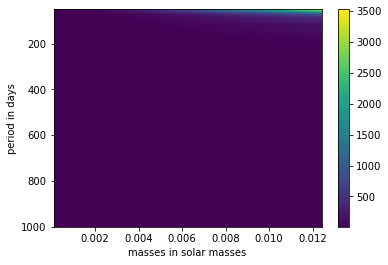

In [20]:
fig,ax= plt.subplots()
im=ax.imshow(np.min(a, axis= 2),extent = [min(massestotest), max(massestotest),max(periodstotest),min(periodstotest)], aspect='auto')

fig.colorbar(im)
ax.set_ylabel('period in days')
ax.set_xlabel('masses in solar masses')


Text(0.5, 0, 'masses in solar masses')

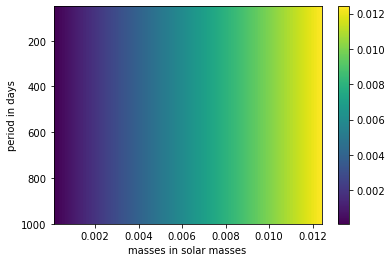

In [21]:
fig,ax= plt.subplots()
im=ax.imshow(np.min(testedmasses, axis= 2),extent = [min(massestotest), max(massestotest),max(periodstotest),min(periodstotest)], aspect='auto')

fig.colorbar(im)
ax.set_ylabel('period in days')
ax.set_xlabel('masses in solar masses')

Text(0.5, 0, 'masses in solar masses')

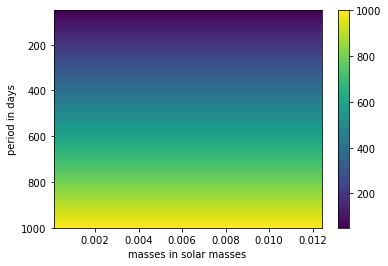

In [22]:
fig,ax= plt.subplots()
im=ax.imshow(np.min(testedperiods, axis= 2),extent = [min(massestotest), max(massestotest),max(periodstotest),min(periodstotest)], aspect='auto')

fig.colorbar(im)
ax.set_ylabel('period in days')
ax.set_xlabel('masses in solar masses')

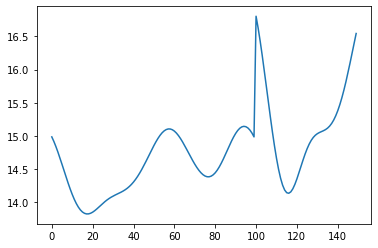

In [23]:
plt.plot(np.resize(a, 5*5*6))

In [24]:
np.savez("biggermeananomly45masstest.npz",a=a,massestotest=massestotest,periodstotest=periodstotest,periastrontotest=periastrontotest )

In [25]:
f=np.load('biggermeananomly45masstest.npz')
a = f["a"]
massestotest = f['massestotest']
periodstotest = f['periodstotest']
periastrontotest = f['periastrontotest']

In [26]:
print(f["a"])

[[[  14.98338481   14.91544202   14.83826389 ...   15.08591009
     15.04061683   14.98338714]
  [  16.80518024   16.62921792   16.43147295 ...   17.07719229
     16.95556386   16.80518024]
  [  19.53125265   19.2252255    18.88436805 ...   20.01332584
     19.79579717   19.53125334]
  ...
  [4112.97999508 4005.26008072 3897.44911838 ... 4317.82519597
   4218.01995362 4112.98000731]
  [4193.57465136 4083.77598974 3973.95189193 ... 4402.51118566
   4300.68991836 4193.57464319]
  [4274.89522047 4162.99867357 4051.14516084 ... 4487.96333916
   4384.10539369 4274.89521644]]

 [[  15.08091616   15.0310225    14.96395451 ...   15.12151835
     15.11156296   15.08091619]
  [  17.16158795   17.0087917    16.81451571 ...   17.31477661
     17.26549431   17.16158795]
  [  20.29486747   19.99640741   19.6300405  ...   20.62808031
     20.5096637    20.29486794]
  ...
  [4703.18637425 4513.55893916 4317.58025151 ... 5012.23586504
   4873.44640219 4703.18640806]
  [4794.4943108  4601.21889814 4401.

6.808982454326428e-07


<ipython-input-27-08107e43d7fe>:8: RuntimeWarning: divide by zero encountered in log10
  im=ax.imshow(np.maximum(np.log10(planetlikihood/noplanetlikihood), -4 ),extent = [min(massestotest)*1047.572, max(massestotest)*1047.572,max(periodstotest),min(periodstotest)], aspect='auto')


Text(0.5, 0, 'masses in Jupiter masses')

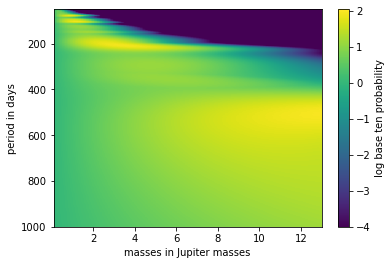

In [27]:
noplanetlikihood=np.exp(loglikelihood([0,120,0,90,
                                               4.6220554014026838e-01,1.6437004273382669e+00,
                                               45,1.40795,-90],actualbrucetransittime , bruceerr, yesplot= False)*-1)
print(noplanetlikihood)
planetlikihood = np.exp(-1*np.min(a, axis= 2))

fig,ax= plt.subplots()
im=ax.imshow(np.maximum(np.log10(planetlikihood/noplanetlikihood), -4 ),extent = [min(massestotest)*1047.572, max(massestotest)*1047.572,max(periodstotest),min(periodstotest)], aspect='auto')

fig.colorbar(im, label = 'log base ten probability')
ax.set_ylabel('period in days')
ax.set_xlabel('masses in Jupiter masses')

In [28]:
print(noplanetlikihood)
print(planetlikihood)
print(np.min(a, axis = 2))

6.808982454326428e-07
[[9.95262434e-07 7.28571698e-07 2.31728906e-07 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.12249274e-06 1.19739844e-06 6.71083286e-07 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.15517813e-06 4.36203529e-06 3.60727673e-06 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [7.05047546e-07 7.37545202e-07 7.71228309e-07 ... 1.01396330e-05
  1.02527843e-05 1.03638865e-05]
 [7.04864782e-07 7.37112926e-07 7.70542449e-07 ... 1.00357488e-05
  1.01480491e-05 1.02583682e-05]
 [7.04707550e-07 7.36728698e-07 7.69916210e-07 ... 9.93236618e-06
  1.00438210e-05 1.01533528e-05]]
[[  13.82025938   14.1321798    15.27769766 ... 3391.02695147
  3459.31588752 3528.26172108]
 [  13.69995869   13.63535932   14.21437259 ... 2678.08356649
  2729.90260136 2782.17707308]
 [  13.04763718   12.3425718    12.53255744 ... 2609.04530741
  2660.66296982 2712.76018034]
 ...
 [  14.1650006    14.11993846   14.07528139 ...   11.49905876
    11.48796125   11.47718324]
 

In [29]:
#test=loglikelihood([massestotest[c],periodstotest[d],0.6,8.7598285693573246e+01,
                                              # 4.6220554014026838e-01,1.6437004273382669e+00,
                                               #meananomolytotest[e],1.40795,-90],actualbrucetransittime , bruceerr, yesplot= True)
#print(test)
#print(noplanetlikihood)

In [30]:
import numpy as np
f=np.load('biggermeananomly45masstest.npz')
a = f["a"]
ind = np.unravel_index(np.argmin(f["a"], axis=None), f["a"].shape)
print(ind)
print(f["periodstotest"][ind[0]])
print(f["massestotest"][ind[1]])
#meananomolytotest = np.linspace(0,360,100)
print(f["periastrontotest"][ind[2]])

(9, 6, 34)
78.59531772575251
0.0008417733404655546
123.63636363636363


[315.90886837 332.80413679 360.96292936 384.89789415 391.93759056
 394.7534865  401.79315997 415.87255671 425.72812932 439.80752397
  79.375085   211.721367   280.710383   290.565959   314.500916  ]
[315.91077874 332.80617425 360.96518121 384.90033758 391.94009038
 394.75599085 401.79573907 415.87523585 425.73088979 439.81039355
  79.37514039 211.72245867 280.71201854 290.56767102 314.50282829]


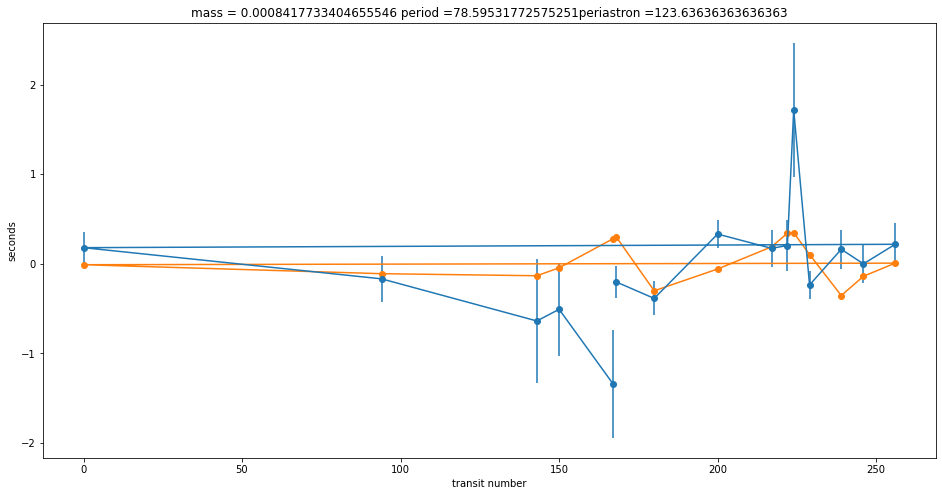

In [31]:
somethingwedontcareabout=np.exp(loglikelihood([f["massestotest"][ind[1]],f["periodstotest"][ind[0]],0,90,
                                               4.6220554014026838e-01,f["periastrontotest"][ind[2]],
                                               45,1.40795,-90],actualbrucetransittime , bruceerr, yesplot= True)*-1)

6.808982454326428e-07
(300, 100, 100)
(300, 100)


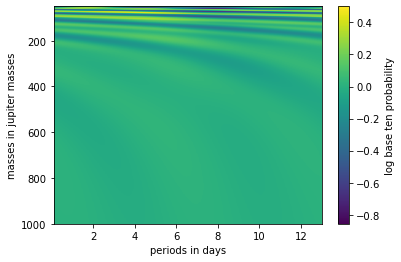

In [32]:

noplanetlikihood=np.exp(loglikelihood([0,120,0,90,
                                               4.6220554014026838e-01,1.6437004273382669e+00,
                                               45,1.40795,-90],actualbrucetransittime , bruceerr, yesplot= False)*-1)
print(noplanetlikihood)
planetlikihood = np.exp(-1*a[:,0,:])
fig,ax= plt.subplots()
im=ax.imshow(np.maximum(np.log10(planetlikihood/noplanetlikihood),-4 ),extent = [min(massestotest)*1047.572, max(massestotest)*1047.572,max(periodstotest),min(periodstotest)], aspect='auto')

fig.colorbar(im, label = 'log base ten probability')
ax.set_xlabel('periods in days')
ax.set_ylabel('masses in jupiter masses')
print(np.shape(a))
print(np.shape(planetlikihood))

[315.90886837 332.80413679 360.96292936 384.89789415 391.93759056
 394.7534865  401.79315997 415.87255671 425.72812932 439.80752397
  79.375085   211.721367   280.710383   290.565959   314.500916  ]
[315.91852061 332.81482035 360.9756693  384.91234461 391.95244507
 394.76846316 401.80909762 415.88965824 425.74604885 439.82650574
  79.37521758 211.72549087 280.71787206 290.57394588 314.51049569]


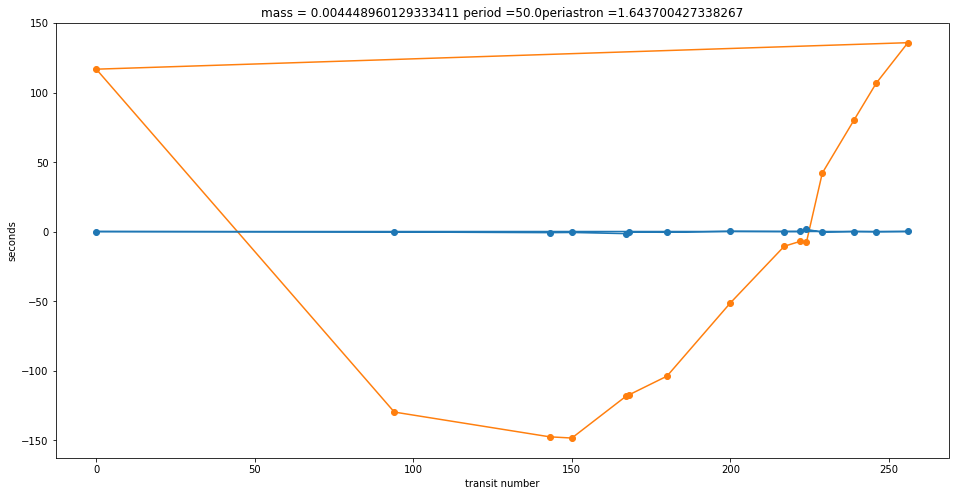

14.159972542868672
14.122704500774075
0.033505150692179124


In [36]:
test=loglikelihood([massestotest[35],periodstotest[0],0.6,8.7598285693573246e+01,
                                               4.6220554014026838e-01,1.6437004273382669e+00,
                                               45,1.40795,-90],actualbrucetransittime , bruceerr, yesplot= True)
#print(test)
#print(noplanetlikihood)
#a[c,d,e]=loglikelihood([1/1047.572,130,ecentricitiestotest[c],inclinationstotest[d],
                                               #4.6220554014026838e-01,1.6437004273382669e+00,
                                               #meananomolytotest[e],1.40795,-90],actualbrucetransittime , bruceerr)
print(a[35,0,0])
print(a[35,0,1])
planetlikihood = np.exp(-1*a[35,0,1])
ratio = np.maximum(np.log10(planetlikihood/noplanetlikihood),-4 ) 
print(ratio)


In [34]:
#fig,ax= plt.subplots()
#im=ax.imshow(np.log(a[:,0,:]))
#np.shape(a[:,0,:])

In [35]:
#junk=np.random.uniform(0,1,(3,6))
#print(junk)
#fig,ax= plt.subplots()
#im=ax.imshow(junk)